### Stock Market Analysis and Prediction using LSTM (Long Short Term Memory)

In [1]:
#pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pickle

##### Data Collection

Collecting stock market closing price data using yfinance of 5 most popular stocks (Amazon, Google, Apple, Netflix, Microsoft) for 10 years and saving it in a CSV file.

In [3]:
# List of stocks and company names
tech_list = ['AMZN', 'GOOGL', 'AAPL', 'NFLX', 'MSFT']
company_name = ["AMAZON", "GOOGLE", "APPLE", "NETFLIX", "MICROSOFT"]

# Set date range for the last 10 years
end = datetime.now()
start = datetime(end.year - 10, 1, 1)

# Initialize an empty DataFrame to store closing prices
stock_list = pd.DataFrame()

# Loop to fetch stock data
for stock, name in zip(tech_list, company_name):
    print(f"Fetching data for {name} ({stock})...")
    data = yf.download(stock, start=start, end=end)

    if data.empty:
        print(f"No data found for {name} ({stock})")
    else:
        # Extract only the 'Close' column
        data = data[['Close']]

        # Rename the 'Close' column to the company's ticker
        data.rename(columns={'Close': stock}, inplace=True)

        # Combine the closing prices of all companies into one DataFrame
        if stock_list.empty:
            stock_list = data
        else:
            stock_list = stock_list.join(data, how='outer')

        # Print confirmation
        print(f"Fetched closing prices for {name} ({stock}).")

    # Add a delay to avoid hitting the API too fast
    time.sleep(1)

# Reset the index to make 'Date' a column
stock_list.reset_index(inplace=True)

# Change the 'Date' format to show only the date
stock_list['Date'] = stock_list['Date'].dt.date

# Save the combined DataFrame to a CSV file
csv_filename = 'stock_closing_prices.csv'
stock_list.to_csv(csv_filename, index=False)

print(f"Closing prices for all companies saved to {csv_filename}.")


Fetching data for AMAZON (AMZN)...


[*********************100%***********************]  1 of 1 completed


Fetched closing prices for AMAZON (AMZN).
Fetching data for GOOGLE (GOOGL)...


[*********************100%***********************]  1 of 1 completed


Fetched closing prices for GOOGLE (GOOGL).
Fetching data for APPLE (AAPL)...


[*********************100%***********************]  1 of 1 completed


Fetched closing prices for APPLE (AAPL).
Fetching data for NETFLIX (NFLX)...


[*********************100%***********************]  1 of 1 completed


Fetched closing prices for NETFLIX (NFLX).
Fetching data for MICROSOFT (MSFT)...


[*********************100%***********************]  1 of 1 completed


Fetched closing prices for MICROSOFT (MSFT).
Closing prices for all companies saved to stock_closing_prices.csv.


In [4]:
# Print the last few rows of the DataFrame
stock_list.tail()

Price,Date,AMZN,GOOGL,AAPL,NFLX,MSFT
Ticker,,AMZN,GOOGL,AAPL,NFLX,MSFT
2747,2024-12-02,210.710007,171.490005,239.589996,897.739990,430.980011
2748,2024-12-03,213.440002,171.339996,242.649994,902.169983,431.200012
2749,2024-12-04,218.160004,174.369995,243.009995,911.059998,437.420013
2750,2024-12-05,220.550003,172.639999,243.039993,917.869995,442.619995
2751,2024-12-06,227.029999,174.710007,242.839996,934.739990,443.570007


In [5]:
# Print the information about the DataFrame
stock_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752 entries, 0 to 2751
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Date, )        2752 non-null   object 
 1   (AMZN, AMZN)    2752 non-null   float64
 2   (GOOGL, GOOGL)  2752 non-null   float64
 3   (AAPL, AAPL)    2752 non-null   float64
 4   (NFLX, NFLX)    2752 non-null   float64
 5   (MSFT, MSFT)    2752 non-null   float64
dtypes: float64(5), object(1)
memory usage: 129.1+ KB


In [6]:
# Print the summary statistics
stock_list.describe()

Price,AMZN,GOOGL,AAPL,NFLX,MSFT
Ticker,AMZN,GOOGL,AAPL,NFLX,MSFT
count,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000
mean,92.760307,77.111617,88.749918,307.126283,172.934212
std,56.360139,43.808156,64.714541,193.049999,123.087003
min,14.347500,24.853001,17.849285,44.887142,34.980000
25%,38.312751,39.889499,31.411876,119.067503,57.754999
50%,90.385498,59.951000,53.322500,310.024994,133.554993
75%,147.114124,114.270498,148.610004,443.205009,268.479996
max,227.029999,191.179993,243.039993,934.739990,467.559998


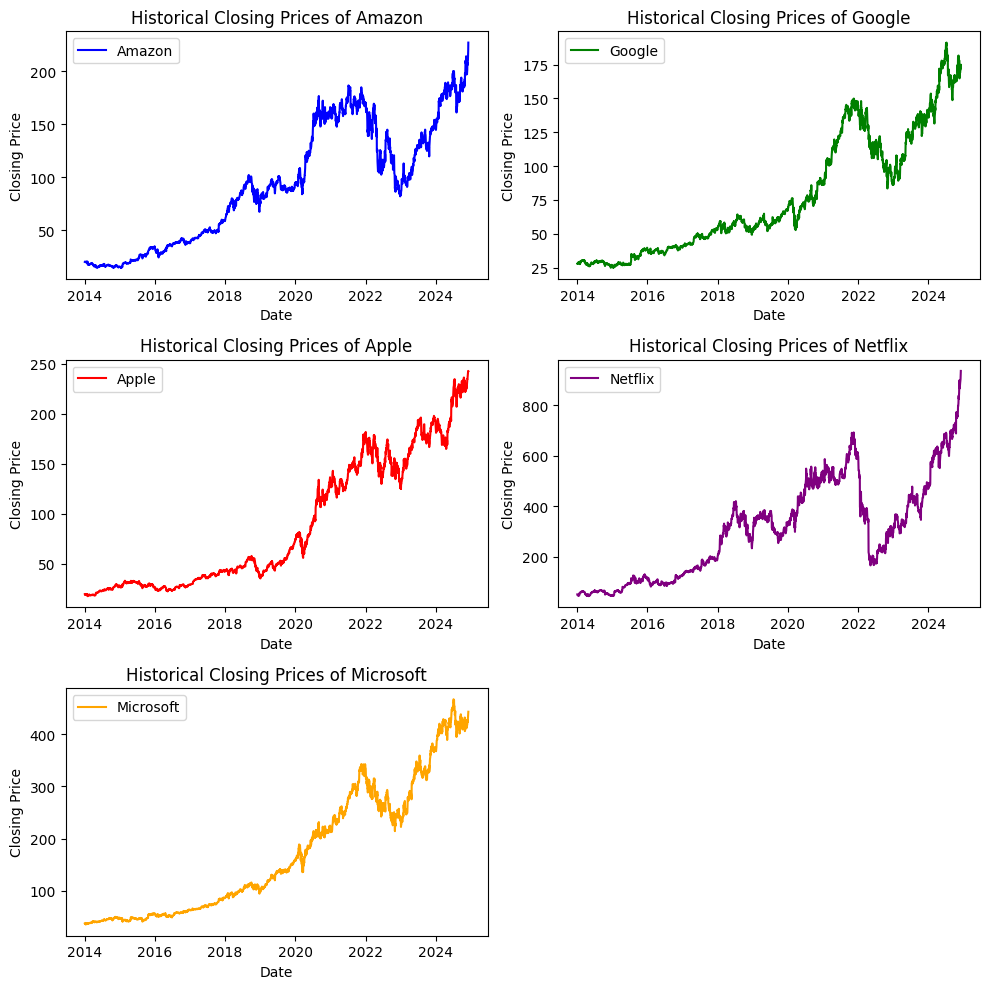

In [7]:
# Plot the closing prices for each stock over time
# Define a color palette for each stock
colors = {
    "AMZN": "blue",
    "GOOGL": "green",
    "AAPL": "red",
    "NFLX": "purple",
    "MSFT": "orange",
}

# Create a figure with adjusted size and layout
plt.figure(figsize=(10, 10))

# Plot Amazon
plt.subplot(3, 2, 1)
plt.plot(stock_list["Date"], stock_list["AMZN"], label="Amazon", color="blue")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Historical Closing Prices of Amazon")
plt.legend()

# Plot Google
plt.subplot(3, 2, 2)
plt.plot(stock_list["Date"], stock_list["GOOGL"], label="Google", color="green")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Historical Closing Prices of Google")
plt.legend()

# Plot Apple
plt.subplot(3, 2, 3)
plt.plot(stock_list["Date"], stock_list["AAPL"], label="Apple", color="red")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Historical Closing Prices of Apple")
plt.legend()

# Plot Netflix
plt.subplot(3, 2, 4)
plt.plot(stock_list["Date"], stock_list["NFLX"], label="Netflix", color="purple")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Historical Closing Prices of Netflix")
plt.legend()

# Plot Microsoft
plt.subplot(3, 2, 5)
plt.plot(stock_list["Date"], stock_list["MSFT"], label="Microsoft", color="orange")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Historical Closing Prices of Microsoft")
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


##### Building LSTM model from scratch

In [8]:
# Custom Metric Functions

def mean_absolute_error_custom(y_true, y_pred):
    """
    Computes the Mean Absolute Error (MAE) between true and predicted values.

    Parameters:
    - y_true (array-like): True values.
    - y_pred (array-like): Predicted values.

    Returns:
    - float: Mean absolute error.
    """
    errors = np.abs(y_true - y_pred)
    return np.mean(errors)

def mean_squared_error_custom(y_true, y_pred):
    """
    Computes the Mean Squared Error (MSE) between true and predicted values.

    Parameters:
    - y_true (array-like): True values.
    - y_pred (array-like): Predicted values.

    Returns:
    - float: Mean squared error.
    """
    squared_errors = (y_true - y_pred) ** 2
    return np.mean(squared_errors)


In [9]:
class LSTMCell:
    """
    Implements a basic Long Short-Term Memory (LSTM) cell for sequence data.

    Attributes:
        input_size (int): The size of the input vector.
        hidden_size (int): The size of the hidden state vector.
        Wf, Wi, Wc, Wo (np.ndarray): Weight matrices for forget, input, cell, and output gates.
        bf, bi, bc, bo (np.ndarray): Bias vectors for forget, input, cell, and output gates.
    """

    def __init__(self, input_size, hidden_size):
        """
        Initializes the LSTM cell with given input and hidden sizes.
        Weights are initialized using Xavier initialization.

        Args:
            input_size (int): Size of the input vector.
            hidden_size (int): Size of the hidden state vector.
        """
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Initialize weights and biases
        self.Wf = np.random.randn(hidden_size, hidden_size + input_size) * np.sqrt(1 / (hidden_size + input_size))
        self.bf = np.zeros((hidden_size, 1))

        self.Wi = np.random.randn(hidden_size, hidden_size + input_size) * np.sqrt(1 / (hidden_size + input_size))
        self.bi = np.zeros((hidden_size, 1))

        self.Wc = np.random.randn(hidden_size, hidden_size + input_size) * np.sqrt(1 / (hidden_size + input_size))
        self.bc = np.zeros((hidden_size, 1))

        self.Wo = np.random.randn(hidden_size, hidden_size + input_size) * np.sqrt(1 / (hidden_size + input_size))
        self.bo = np.zeros((hidden_size, 1))

    def forward(self, x, h_prev, c_prev):
        """
        Performs a forward pass through the LSTM cell.

        Args:
            x (np.ndarray): Input vector at the current time step, shape (input_size, 1).
            h_prev (np.ndarray): Previous hidden state, shape (hidden_size, 1).
            c_prev (np.ndarray): Previous cell state, shape (hidden_size, 1).

        Returns:
            tuple: Current hidden state (h, shape (hidden_size, 1)) and cell state (c, shape (hidden_size, 1)).
        """
        combined = np.vstack((h_prev, x))  # Concatenate input and previous hidden state
        f = self.sigmoid(np.dot(self.Wf, combined) + self.bf)  # Forget gate
        i = self.sigmoid(np.dot(self.Wi, combined) + self.bi)  # Input gate
        c_hat = np.tanh(np.dot(self.Wc, combined) + self.bc)   # Candidate cell state
        c = f * c_prev + i * c_hat                             # Updated cell state
        o = self.sigmoid(np.dot(self.Wo, combined) + self.bo)  # Output gate
        h = o * np.tanh(c)                                     # Updated hidden state
        return h, c

    def sigmoid(self, x):
        """
        Applies the sigmoid activation function.

        Args:
            x (np.ndarray): Input vector.

        Returns:
            np.ndarray: Output after applying the sigmoid function.
        """
        return 1 / (1 + np.exp(-x))



In [10]:
class LSTMModel:
    """
    Long Short-Term Memory (LSTM) based model for sequence processing tasks.

    Attributes:
        hidden_size (int): Size of the hidden state in the LSTM.
        lstm (LSTMCell): LSTM cell instance for processing sequence data.
        Wy (ndarray): Weight matrix for the output layer.
        by (ndarray): Bias vector for the output layer.
    """

    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize the LSTMModel.

        Args:
            input_size (int): Number of input features.
            hidden_size (int): Number of hidden units in the LSTM.
            output_size (int): Number of output features.
        """
        self.hidden_size = hidden_size
        self.lstm = LSTMCell(input_size, hidden_size)
        self.Wy = np.random.randn(output_size, hidden_size) * np.sqrt(1 / hidden_size)
        self.by = np.zeros((output_size, 1))

    def forward(self, x_seq):
        """
        Perform a forward pass through the LSTM model.

        Args:
            x_seq (ndarray): Sequence of input data with shape (sequence_length, input_size).

        Returns:
            tuple:
                - y (ndarray): Final output of the model.
                - h_cache (list): List of hidden states for each timestep.
                - c_cache (list): List of cell states for each timestep.
        """
        h = np.zeros((self.hidden_size, 1))
        c = np.zeros((self.hidden_size, 1))
        h_cache, c_cache = [], []

        for x in x_seq:
            h, c = self.lstm.forward(x.reshape(-1, 1), h, c)
            h_cache.append(h)
            c_cache.append(c)

        y = np.dot(self.Wy, h) + self.by
        return y, h_cache, c_cache

    def train(self, x_train, y_train, learning_rate, beta1, beta2, epochs, clip_value=1.0):
        """
        Train the LSTM model using the Adam optimizer.

        Args:
            x_train (list): List of training input sequences.
            y_train (list): List of corresponding target sequences.
            learning_rate (float): Learning rate for gradient updates.
            beta1 (float): Exponential decay rate for the first moment estimate.
            beta2 (float): Exponential decay rate for the second moment estimate.
            epochs (int): Number of training epochs.
            clip_value (float): Maximum value for gradient clipping (default: 1.0).
        """
        V_dWy = np.zeros_like(self.Wy)
        V_dby = np.zeros_like(self.by)
        S_dWy = np.zeros_like(self.Wy)
        S_dby = np.zeros_like(self.by)

        for epoch in range(epochs):
            total_loss = 0
            for x_seq, y_true in zip(x_train, y_train):
                # Forward pass
                y_pred, h_cache, _ = self.forward(x_seq)
                loss = np.mean((y_pred - y_true) ** 2)
                total_loss += loss

                # Backpropagation Through Time
                dL_dy = 2 * (y_pred - y_true)
                dWy = np.dot(dL_dy, h_cache[-1].T)
                dby = dL_dy

                # Gradient Clipping
                dWy = np.clip(dWy, -clip_value, clip_value)
                dby = np.clip(dby, -clip_value, clip_value)

                # Update weights using Adam Optimizer
                V_dWy = beta1 * V_dWy + (1 - beta1) * dWy
                V_dby = beta1 * V_dby + (1 - beta1) * dby
                S_dWy = beta2 * S_dWy + (1 - beta2) * (dWy ** 2)
                S_dby = beta2 * S_dby + (1 - beta2) * (dby ** 2)

                V_dWy_corr = V_dWy / (1 - beta1 ** (epoch + 1))
                V_dby_corr = V_dby / (1 - beta1 ** (epoch + 1))
                S_dWy_corr = S_dWy / (1 - beta2 ** (epoch + 1))
                S_dby_corr = S_dby / (1 - beta2 ** (epoch + 1))

                self.Wy -= learning_rate * V_dWy_corr / (np.sqrt(S_dWy_corr) + 1e-8)
                self.by -= learning_rate * V_dby_corr / (np.sqrt(S_dby_corr) + 1e-8)

            print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(x_train)}")

    def predict(self, x_seq):
        """
        Predict the output for a given input sequence.

        Args:
            x_seq (ndarray): Input sequence with shape (sequence_length, input_size).

        Returns:
            ndarray: Predicted output for the input sequence.
        """
        y, _, _ = self.forward(x_seq)
        return y



Predicting the closing stock price of APPLE inc

Preparing the data

In [11]:
def min_max_scaler(data):
    """
    Scales numerical data to the range [0, 1] using Min-Max Scaling.

    Parameters:
        data (array-like): Input 1D numerical data.

    Returns:
        tuple: A tuple containing:
            - scaled_data (np.ndarray): Scaled data in the range [0, 1].
            - min_val (float): Minimum value of the input data.
            - max_val (float): Maximum value of the input data.
    """
    min_val = data.min()
    max_val = data.max()
    scaled_data = (data - min_val) / (max_val - min_val)

    return scaled_data, min_val, max_val


In [12]:
def create_dataset(data, time_steps=60):
    """
    Prepares input and output datasets for time series forecasting.

    Args:
        data (numpy.ndarray): The input data array, where each row represents a time step.
        time_steps (int): The number of time steps to include in each input sequence (default is 60).

    Returns:
        tuple: A tuple (X, y) where:
            - X (numpy.ndarray): Input sequences of shape (num_samples, time_steps).
            - y (numpy.ndarray): Corresponding target values of shape (num_samples,).
    """
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


In [13]:
def data_prep(comp):
  """
    Prepares data for training and testing an LSTM model for time series forecasting.

    Args:
        comp (str): The stock or component identifier to extract data from the stock_list DataFrame.

    Returns:
        tuple: A tuple containing:
            - X_train (np.ndarray): Training feature set reshaped for LSTM input.
            - X_test (np.ndarray): Testing feature set reshaped for LSTM input.
            - y_train (np.ndarray): Training target values.
            - y_test (np.ndarray): Testing target values.
            - min_val (float): Minimum value of the original data (used for scaling).
            - max_val (float): Maximum value of the original data (used for scaling).
  """
  data = stock_list[[comp]]
  data = data.values
  training_data_len = int(len(data)*0.95)
  scaled_data, min_val, max_val = min_max_scaler(data)

  #Training and test data split
  train_data = scaled_data[:training_data_len]
  test_data = scaled_data[training_data_len - 60:]  # Include overlap for sliding window

  X_train, y_train = create_dataset(train_data)
  X_test, y_test = create_dataset(test_data)

  # Reshape inputs for LSTM
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

  return X_train, X_test, y_train, y_test, min_val, max_val

In [14]:
# Prepare Data
X_train, X_test, y_train, y_test, min_val, max_val= data_prep("AAPL")

In [15]:
# Hyperparameters
input_units = 1  # Input size
hidden_units = 256  # Hidden neurons
output_units = 1  # Output size (predict single value)
learning_rate = 0.001
beta1 = 0.90
beta2 = 0.999
epochs = 10

# Train Model
model = LSTMModel(input_units, hidden_units, output_units)
model.train(X_train, y_train, learning_rate, beta1, beta2, epochs)

Epoch 1/10, Loss: 0.00010041854602426969
Epoch 2/10, Loss: 0.0002520307704879015
Epoch 3/10, Loss: 0.00010481534138637503
Epoch 4/10, Loss: 8.90277414467766e-05
Epoch 5/10, Loss: 8.577362334182216e-05
Epoch 6/10, Loss: 8.445425381157494e-05
Epoch 7/10, Loss: 8.363496659083296e-05
Epoch 8/10, Loss: 8.301055284322279e-05
Epoch 9/10, Loss: 8.24894245073497e-05
Epoch 10/10, Loss: 8.203528587679951e-05


In [16]:
# Save the trained model to a file
with open("Apple_lstm_model.pkl", "wb") as file:
    pickle.dump(model, file)

# Load the model from the file
with open("Apple_lstm_model.pkl", "rb") as file:
    model = pickle.load(file)

In [17]:
def inverse_min_max_scaler(scaled_data, min_val, max_val):
    """
    Reverses min-max scaling to restore the original data range.

    Parameters:
        scaled_data (float or array-like): Scaled data in the range [0, 1].
        min_val (float): Minimum value of the original data.
        max_val (float): Maximum value of the original data.

    Returns:
        float or array-like: Data rescaled to the original range.
    """
    return (scaled_data * (max_val - min_val)) + min_val


Mean Absolute Error (MAE): 12.77218814887333
Mean Squared Error (MSE): 293.70565989942105


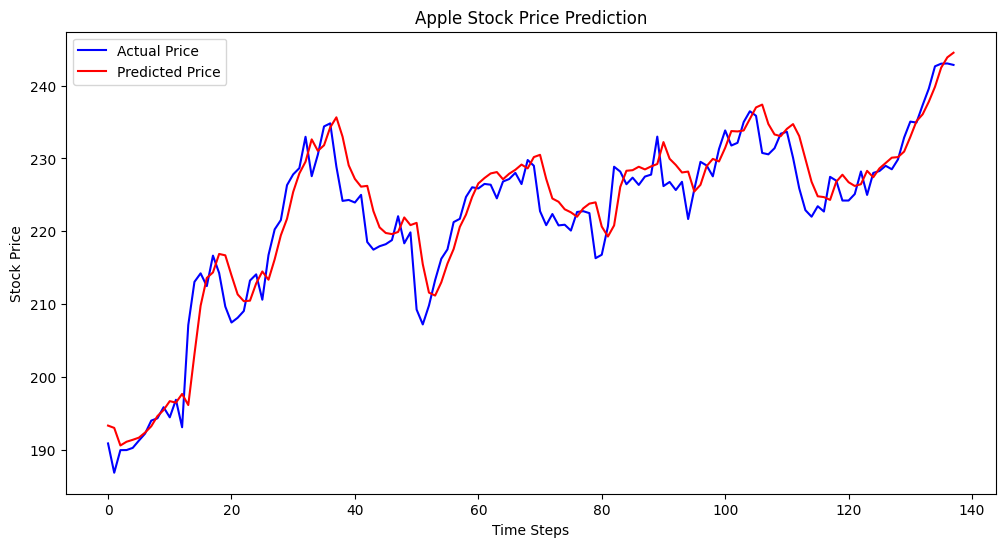

In [18]:
# Evaluate on Test Data
predictions = []
for i in range(len(X_test)):
    x_seq = X_test[i]
    y_pred = model.predict(x_seq)
    predictions.append(y_pred.flatten())

# Reshape and Inverse Scale Predictions
predictions = np.array(predictions)
predictions_original = inverse_min_max_scaler(predictions, min_val, max_val)
y_test_original = inverse_min_max_scaler(y_test, min_val, max_val)

# Calculate Metrics
mae = mean_absolute_error_custom(y_test_original, predictions_original)
mse = mean_squared_error_custom(y_test_original, predictions_original)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label="Actual Price", color="blue")
plt.plot(predictions_original, label="Predicted Price", color="red")
plt.title("Apple Stock Price Prediction")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [19]:
def forecast(data, model):
  """
    Generates a forecasted value using the provided model and recent data.

    Args:
        data (array-like): The input time series data, typically the stock's closing prices.
        model (keras.Model): A pre-trained LSTM model used for making predictions.

    Returns:
        float: The forecasted value after applying inverse scaling.
  """
  fc_df = data[-60:]
  fc_df = np.append(fc_df,0)

  i=60
  fc_X = []
  fc_X.append(fc_df[i-60:i])
  fc_X = np.array(fc_X)

  # Reshape inputs for LSTM
  fc_X = np.reshape(fc_X, (fc_X.shape[1], 1))
  fc_y = model.predict(fc_X)
  fc_y = np.array(fc_y)
  fc_y = inverse_min_max_scaler(fc_y, min_val, max_val)
  return fc_y[0][0]


In [20]:
# Forecast
Apple_forecast = forecast(y_test,model)
print("The forecasted closing price of APPLE is : ", Apple_forecast)


The forecasted closing price of APPLE is :  244.6453830479852


Predicting the closing stock price of Netflix

In [21]:
# Prepare Data
X_train, X_test, y_train, y_test, min_val, max_val = data_prep("NFLX")

In [22]:
# Train Model
model.train(X_train, y_train, learning_rate, beta1, beta2, epochs)

Epoch 1/10, Loss: 0.00012645744636987318
Epoch 2/10, Loss: 0.0001463729833997826
Epoch 3/10, Loss: 0.00012409231247521139
Epoch 4/10, Loss: 0.0001194357138176433
Epoch 5/10, Loss: 0.00011768849976662735
Epoch 6/10, Loss: 0.00011670856608829012
Epoch 7/10, Loss: 0.00011602617045744356
Epoch 8/10, Loss: 0.0001154950997262796
Epoch 9/10, Loss: 0.00011505678451550303
Epoch 10/10, Loss: 0.00011468269969544308


In [23]:
# Save the trained model to a file
with open("NFLX_lstm_model.pkl", "wb") as file:
    pickle.dump(model, file)

# Load the model from the file
with open("NFLX_lstm_model.pkl", "rb") as file:
    model = pickle.load(file)

Mean Absolute Error (MAE): 79.50679811641527
Mean Squared Error (MSE): 11430.47923875168


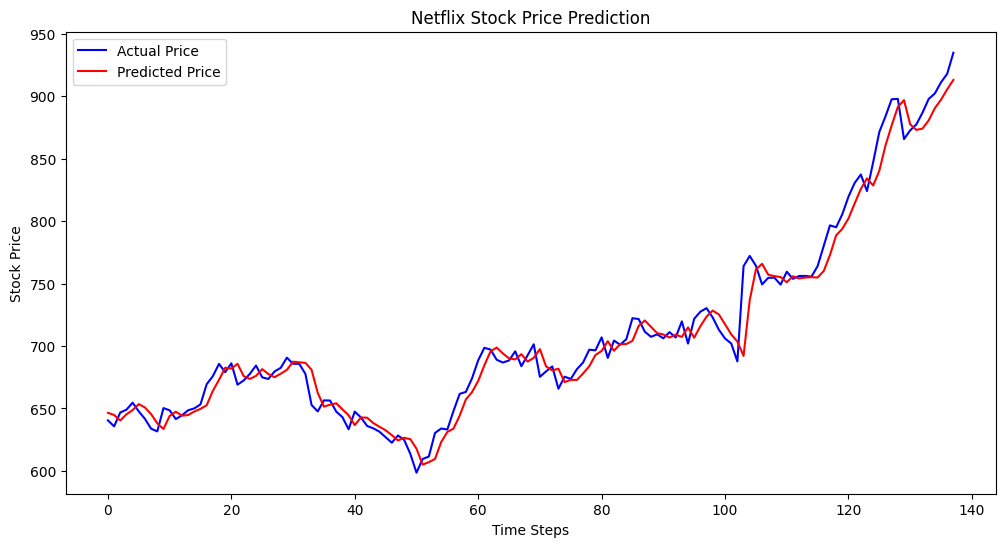

In [24]:
# Evaluate on Test Data
predictions = []
for i in range(len(X_test)):
    x_seq = X_test[i]
    y_pred = model.predict(x_seq)
    predictions.append(y_pred.flatten())

# Reshape and Inverse Scale Predictions
predictions = np.array(predictions)
predictions_original = inverse_min_max_scaler(predictions, min_val, max_val)
y_test_original = inverse_min_max_scaler(y_test, min_val, max_val)

# Calculate Metrics
mae = mean_absolute_error_custom(y_test_original, predictions_original)
mse = mean_squared_error_custom(y_test_original, predictions_original)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label="Actual Price", color="blue")
plt.plot(predictions_original, label="Predicted Price", color="red")
plt.title("Netflix Stock Price Prediction")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [25]:
# Forecast
Netflix_forecast = forecast(y_test,model)
print("The forecasted closing price of Netflix is : ", Netflix_forecast)

The forecasted closing price of Netflix is :  926.5177767069921
